<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Base_CNN_Model_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir_train = "/content/drive/MyDrive/hack_train/"
data_dir_test = "/content/drive/MyDrive/hack_test/"
num_classes = 2

In [3]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
)

train_gen = datagen.flow_from_directory(
    directory= data_dir_train,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    #subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir_test,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    #subset = 'validation',
    class_mode = 'binary'

)

Found 591 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [4]:
input_shape = train_gen.image_shape
input_shape

(125, 125, 3)

In [5]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(128,activation = 'relu'),
                    Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 16)        1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 32)        0

In [7]:
from keras.callbacks import EarlyStopping

In [8]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [10]:
Epoch = 100
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/100
20/20 [==============================] - 96s 5s/step - loss: 7.8498 - accuracy: 0.5279 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 26s 1s/step - loss: 0.6831 - accuracy: 0.7648 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 26s 1s/step - loss: 0.6164 - accuracy: 0.7191 - val_loss: 0.5526 - val_accuracy: 0.8611
Epoch 4/100
20/20 [==============================] - 26s 1s/step - loss: 0.4270 - accuracy: 0.8714 - val_loss: 0.5024 - val_accuracy: 0.7778
Epoch 5/100
20/20 [==============================] - 26s 1s/step - loss: 0.4215 - accuracy: 0.8223 - val_loss: 0.3598 - val_accuracy: 0.8889
Epoch 6/100
20/20 [==============================] - 25s 1s/step - loss: 0.2481 - accuracy: 0.9255 - val_loss: 0.2544 - val_accuracy: 0.9097
Epoch 7/100
20/20 [==============================] - 26s 1s/step - loss: 0.4169 - accuracy: 0.8190 - val_loss: 0.4642 - val_accuracy: 0.8681
Epoch 8/100
2

In [11]:
model.evaluate(valid_gen)

5/5 [==============================] - 2s 324ms/step - loss: 0.1570 - accuracy: 0.9514


[0.15697255730628967, 0.9513888955116272]

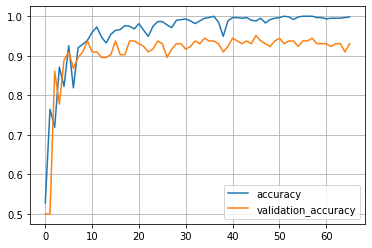

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.grid()
plt.show()

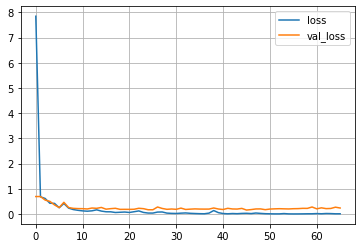

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)
print (cm)


print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[69  3]
 [ 4 68]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.95        72
     Seizure       0.96      0.94      0.95        72

    accuracy                           0.95       144
   macro avg       0.95      0.95      0.95       144
weighted avg       0.95      0.95      0.95       144



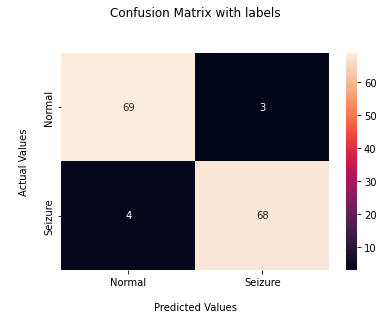

In [15]:
ax = sns.heatmap(cm, annot=True)

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Normal','Seizure'])
ax.yaxis.set_ticklabels(['Normal','Seizure'])

## Display the visualization of the Confusion Matrix.
plt.show()